#### The heart is a muscular organ located in the precaudium and pump blood through the circulatory system to all part of the body. It is about the size of individual fist. When heart could no longer perform this pumping function it is said to experience heart failure (HF)
#### The expected objective of this project is to develop analysis and use machine learning strategies to validate different prediction models aimed at predicting mortality among ICU-admitted HF patients.
#### The outcome of this project is to be able to see the effect of patients paraments through machine learning in predicting the outcome of patients that are admitted in ICU because of heart failure.

### Performance Metrics
#### The following metrics are to be use to assess the quality and reliability of our Models.
#### 1. Accuracy: Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number       of correct predictions and the total number of predictions.
#### 2. Confusion Matrix: A confusion matrix is defined as the table that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.
#### 3. Precision: It explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives
#### 4. Recall:  It explains how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative is of higher concern than False Positive. It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

In [1]:
#pip install imbalanced-learn
#pip install xgboost
#pip instal lightgbm

In [97]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectPercentile, chi2 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
#pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('icudata.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gender                    1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [5]:
data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gender                        0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [6]:
data.duplicated().sum()

0

In [7]:
#### We are loading some features of importance from our dataset into a pandas dataframe for prediction of model performance. This will be named data2

In [8]:
#### The features are that are being called from the general data have been found to have effects of the morbidity and mortality of patients with HF

In [9]:
#A1
cols = [ 'group', 'outcome', 'age', 'gender', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'Creatinine', 'Diastolic blood pressure', 'Systolic blood pressure', ]

In [10]:
data2 = pd.read_csv('icudata.csv', usecols=cols)
data2.head()


,group,outcome,age,gender,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,Systolic blood pressure,Diastolic blood pressure,Creatinine
0,1,0.0,72,1,0,0,0,1,1,0,1,1,0,155.866667,68.333333,1.958333
1,1,0.0,75,2,0,0,0,0,1,0,0,0,1,140.000000,65.000000,1.122222
2,1,0.0,83,2,0,0,0,0,1,0,0,1,0,135.333333,61.375000,1.871429
3,1,0.0,43,2,0,0,0,0,0,0,0,0,0,126.400000,73.200000,0.585714
4,1,0.0,75,2,1,0,0,0,1,0,0,1,1,156.560000,58.120000,1.950000


In [11]:
data2.shape

(1177, 16)

In [12]:
data2.isnull().sum()

group                        0
outcome                      1
age                          0
gender                       0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
Systolic blood pressure     16
Diastolic blood pressure    16
Creatinine                   0
dtype: int64

In [13]:
missing_percentages = data2.isnull().mean()*100

In [14]:
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

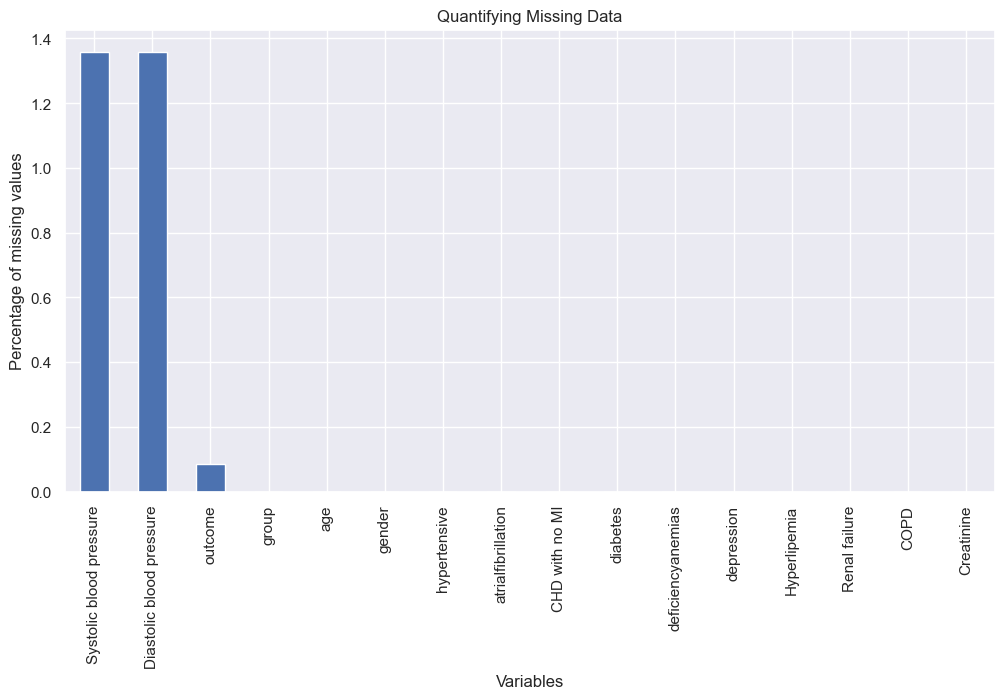

In [15]:
plt.figure(figsize=(12, 6))
missing_percentages_sorted.plot.bar()
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')
plt.show()

In [16]:
#A2 Split data2 into train and test data

train2,test2 = train_test_split(
    data2, test_size=0.2,
    random_state=42
)

In [17]:
print(data2.shape)
print(train2.shape)
print(test2.shape)

(1177, 16)
(941, 16)
(236, 16)


In [18]:
#A3 To rearrange the index of the data

train2.reset_index(drop=True, inplace=True)

In [19]:
#A4 To address missing values in the train2 drop NaN because there is only one missing value in the target column i.e. outcome also for Systolic and Diastolic blood pressure the proportion of missingness is 1.4% and because of how sensitive the data is imputation will affect our prediction outcome. 

train2 = train2.dropna()

In [20]:
# Check for duplicate data in train2

train2.duplicated().sum()

0

In [21]:
for col in train2.columns:
    if train2[col].dtype == 'object':
        print(f'{col}:\nhas the following classes\n{train2[col].unique()}\n')

In [22]:
#### Removing outliers from continuous variable in train2 before spliting to X and y train. 

In [23]:
# define function to remove outliers
def drop_outlier(train2,var):
    q1, q3 = np.percentile(train2[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    train2 = train2[train2[var]< upper]
    train2 = train2[train2[var]> lower]
    train2.reset_index(drop=True, inplace = True)
    return train2

In [24]:
#A5 Dropping outliers in age

train2_out = drop_outlier(train2,'age')

In [25]:
train2_out.shape

(922, 16)

In [26]:
### Feature - Target Split

In [27]:
#A6 Split Data
target = 'outcome'
X_train2 = train2_out.drop(target, axis=1)
y_train2 = train2_out[target]

print(X_train2.shape )

(922, 15)


In [28]:
print(y_train2.shape)

(922,)


In [29]:
#To check for data composition in target (y_train)

grp_data = pd.concat([X_train2,y_train2],axis=1)

In [30]:
grp_data[target].value_counts()

outcome
0.0    802
1.0    120
Name: count, dtype: int64

In [31]:
label_freq = grp_data[target].value_counts() / len(grp_data)
print(label_freq)

outcome
0.0    0.869848
1.0    0.130152
Name: count, dtype: float64


Text(0.5, 1.0, 'Identifying Rare Categories')

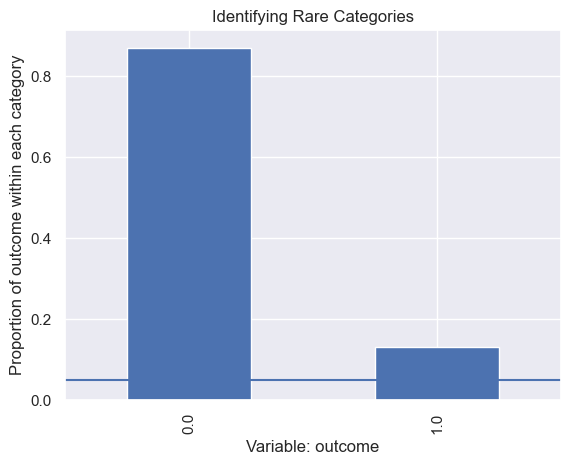

In [32]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05,)
fig.set_ylabel('Proportion of outcome within each category')
fig.set_xlabel('Variable: outcome')
fig.set_title('Identifying Rare Categories')

In [33]:
##The minority class here ("1"- Death as an outcome) are the anomalies.

In [34]:
## Data balancing by upsampling of 1 in outcome to meet up with 0. X_train and y_train were renamed X_train_bal and y_train_bal after upsampling with SMOTE

In [35]:
#A7

smote = SMOTE()
X_train2_bal, y_train2_bal = smote.fit_resample(X_train2,y_train2)

In [36]:
from collections import Counter
print('Original y shape:',Counter(y_train2))
print('Resampled y shape:',Counter(y_train2_bal))

Original y shape: Counter({0.0: 802, 1.0: 120})
Resampled y shape: Counter({0.0: 802, 1.0: 802})


In [37]:
label_freq_bal = y_train2_bal.value_counts() / len(y_train2_bal)
print(label_freq_bal)

outcome
0.0    0.5
1.0    0.5
Name: count, dtype: float64


Text(0.5, 1.0, 'Balancing Rare Categories')

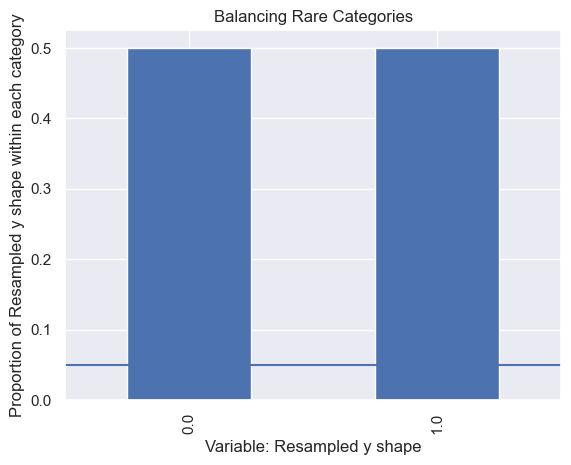

In [38]:
fig = label_freq_bal.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05,)
fig.set_ylabel('Proportion of Resampled y shape within each category')
fig.set_xlabel('Variable: Resampled y shape')
fig.set_title('Balancing Rare Categories')

In [39]:
## Feature Engineering

In [40]:
X_train2.head()

,group,age,gender,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,Systolic blood pressure,Diastolic blood pressure,Creatinine
0,1,81,2,1,0,0,0,0,0,1,0,0,121.904762,51.714286,0.780000
1,1,82,1,1,1,0,0,1,0,1,1,0,113.423077,49.520000,1.588889
2,1,52,1,1,0,0,1,0,1,1,0,0,121.250000,77.833333,0.838462
3,1,89,2,0,1,0,0,0,0,0,0,0,95.517857,47.178571,1.700000
4,1,89,2,1,1,0,0,0,0,0,0,0,115.093750,54.500000,0.611111


In [41]:
#A8
target = 'outcome'
X_train2 = train2_out.drop("outcome", axis=1)

y_train2 = train2_out["outcome"]


In [42]:
label_freq = train2_out['outcome'].value_counts()
print(label_freq)

outcome
0.0    802
1.0    120
Name: count, dtype: int64


In [43]:
y_train2.value_counts()

outcome
0.0    802
1.0    120
Name: count, dtype: int64

In [44]:
## Defining terms for Systolic blood pressure

In [45]:
def classifySystolicbloodpressure (Systolic_blood_pressure):
    if Systolic_blood_pressure <120:
        return 'Normal'
    elif 120 <= Systolic_blood_pressure< 129:
        return 'Elevated'
    elif 130 <= Systolic_blood_pressure< 139:
        return 'Stage 1 Hypertension'
    elif 140 <= Systolic_blood_pressure< 189:
        return 'Stage 2 Hypertension'
    else: 
        return 'Hypertensive crisis'

In [46]:
classifySystolicbloodpressure (183)

'Stage 2 Hypertension'

In [47]:
#A9
X_train2['classifySystolicbloodpressure'] = X_train2['Systolic blood pressure'].apply(classifySystolicbloodpressure)

In [48]:
X_train2['classifySystolicbloodpressure'].unique()

array(['Elevated', 'Normal', 'Stage 1 Hypertension',
       'Stage 2 Hypertension', 'Hypertensive crisis'], dtype=object)

In [49]:
order = ['Normal', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive crisis']


classifySystolicbloodpressure_encoder = OrdinalEncoder(categories=[order], dtype=int)
classifySystolicbloodpressure_encoder.fit(X_train2[['classifySystolicbloodpressure']])

#A10

X_train2['classifySystolicbloodpressure'] = classifySystolicbloodpressure_encoder.transform(X_train2[['classifySystolicbloodpressure']])



In [50]:
X_train2['classifySystolicbloodpressure'].unique()

array([1, 0, 2, 3, 4])

In [51]:
# Createfunction for Diastolic pressure

def classifyDiastolicbloodpressure (Diastolic_blood_pressure):
    if Diastolic_blood_pressure <80:
        return 'Normal'
    elif 80 <= Diastolic_blood_pressure< 89:
        return 'Stage 1 Hypertension'
    elif 90 <= Diastolic_blood_pressure< 120:
        return 'Stage 2 Hypertension'
    else: 
        return 'Hypertensive crisis'

In [52]:
classifyDiastolicbloodpressure (140)

'Hypertensive crisis'

In [53]:
#A11
X_train2['Diastolic_blood_pressure_class'] = X_train2['Diastolic blood pressure'].apply(classifyDiastolicbloodpressure)

In [54]:
X_train2['Diastolic_blood_pressure_class'].unique()

array(['Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Hypertensive crisis'], dtype=object)

In [55]:
order = ['Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive crisis']

classifyDiastolicbloodpressure_encoder = OrdinalEncoder(categories=[order], dtype=int)
classifyDiastolicbloodpressure_encoder.fit(X_train2[['Diastolic_blood_pressure_class']])

#A12
X_train2['Diastolic_blood_pressure_class'] = classifyDiastolicbloodpressure_encoder.transform(X_train2[['Diastolic_blood_pressure_class']])

In [56]:
X_train2['Diastolic_blood_pressure_class'].unique()

array([0, 1, 2, 3])

In [57]:
# Createfunction for Creatinine

def Creatinineclass (Creatinine):
    if Creatinine <0.6:
        return 'Low'
    elif 0.6 <= Creatinine< 1.3:
        return 'Normal'
    else: 
        return 'Elevated'

In [58]:
Creatinineclass(1.1)

'Normal'

In [59]:
#A13
X_train2['Creatinineclass'] = X_train2['Creatinine'].apply(Creatinineclass)

In [60]:
X_train2['Creatinineclass'].unique()

array(['Normal', 'Elevated', 'Low'], dtype=object)

In [61]:
order = ['Low', 'Normal', 'Elevated']

Creatinineclass_encoder = OrdinalEncoder(categories=[order], dtype=int)
Creatinineclass_encoder.fit(X_train2[['Creatinineclass']])

#A14
X_train2['Creatinineclass'] = Creatinineclass_encoder.transform(X_train2[['Creatinineclass']])



In [62]:
X_train2['Creatinineclass'].unique()

array([1, 2, 0])

In [63]:
# Create function to put age into different categorize

def classifyage (age):
    if age<18: 
        return 'Child'
    elif 18 <= age < 44 :
        return 'Young'
    elif 44 <= age < 60 :
        return 'Middle'
    elif 60 <= age < 75:
        return 'Elderly'
    elif 75 <= age < 90 :
        return 'Senile'
    else: 
        return 'Longliver'

In [64]:
classifyage(16)

'Child'

In [65]:
#A15

X_train2['classifyage'] = X_train2['age'].apply(classifyage)

In [66]:
X_train2['classifyage'].unique()

array(['Senile', 'Middle', 'Elderly', 'Longliver', 'Young'], dtype=object)

In [67]:
order = ['Child', 'Young', 'Middle', 'Elderly', 'Senile', 'Longliver']

classifyage_encoder = OrdinalEncoder(categories=[order], dtype=int)
classifyage_encoder.fit(X_train2[['classifyage']])

#A16
X_train2['classifyage'] = classifyage_encoder.transform(X_train2[['classifyage']])

In [68]:
X_train2['classifyage'].unique()

array([4, 2, 3, 5, 1])

In [69]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group                           922 non-null    int64  
 1   age                             922 non-null    int64  
 2   gender                          922 non-null    int64  
 3   hypertensive                    922 non-null    int64  
 4   atrialfibrillation              922 non-null    int64  
 5   CHD with no MI                  922 non-null    int64  
 6   diabetes                        922 non-null    int64  
 7   deficiencyanemias               922 non-null    int64  
 8   depression                      922 non-null    int64  
 9   Hyperlipemia                    922 non-null    int64  
 10  Renal failure                   922 non-null    int64  
 11  COPD                            922 non-null    int64  
 12  Systolic blood pressure         922 

In [70]:
cat_col = []

for i in X_train2.columns:
    if X_train2[i].dtype == 'object':
        cat_col.append(i)

num_col = []

for i in X_train2.columns:
    if (X_train2[i].dtype == 'int32') | (X_train2[i].dtype == 'int64') |(X_train2[i].dtype == 'float64') :
        num_col.append(i)

In [71]:
#### Checking for correlations of the features among themselves through multicolinearity to determine the ones that are important to the target.

<Axes: >

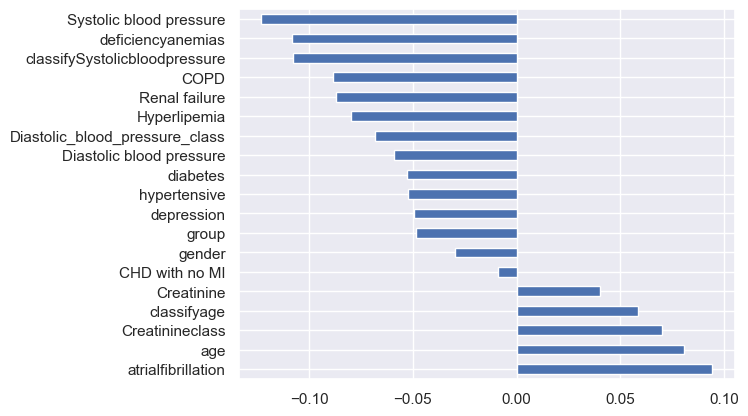

In [72]:
grp_data = pd.concat([X_train2[num_col],y_train2],axis=1)
corre = grp_data.corr()
target_corr = corre[target].drop(target)
target_corr.sort_values(ascending=False,inplace=True)
target_corr.plot(kind='barh')

In [73]:
#### Checking for multicolinearity among the features 

<Axes: >

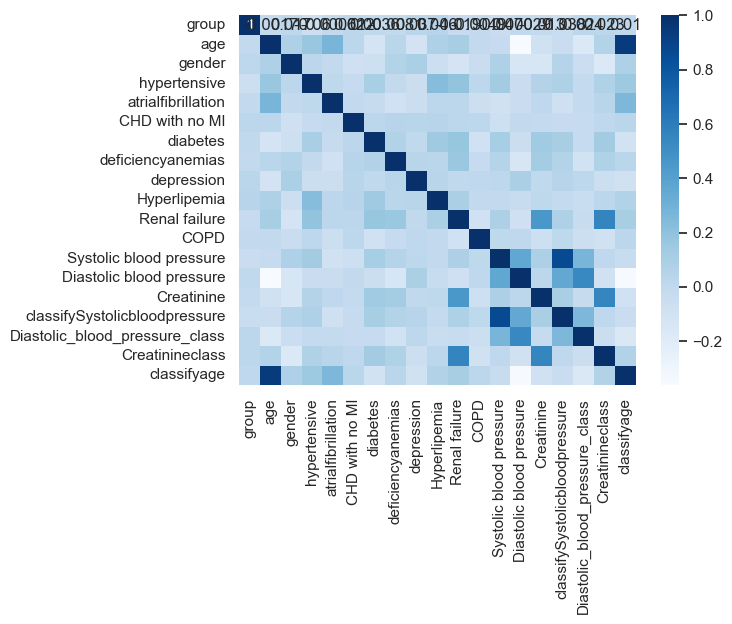

In [74]:
corr = X_train2[num_col].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [75]:
cat_col

[]

#### We are dropping some features due to multicolinearity among themselves. We drop classifyage because of its correlation to age, creatinineclass correlation to Creatinine, Diastolic_blood_pressure_class was drop for Diastolic blood pressure and classifySystolicbloodpressure was drop for Systolic blood pressure

In [76]:
#For nominal categorical value
onehotencoder = OneHotEncoder(handle_unknown='ignore')

encoded_features = onehotencoder.fit_transform(X_train2[['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure','Diastolic_blood_pressure_class']]).toarray()
# Get the feature names for the encoded columns
encoded_feature_names = onehotencoder.get_feature_names_out(['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure', 'Diastolic_blood_pressure_class'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

X_train2 = pd.concat([X_train2.drop(['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure', 'Diastolic_blood_pressure_class'], axis=1), encoded_df], axis=1)

In [77]:
#### Determine feature importance i.e. features that are predictors of heart failure 

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train2, y_train2)
predictors = X_train2.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef = coef.to_frame()
coef

,0
Diastolic blood pressure,0.238927
Creatinine,0.230899
Systolic blood pressure,0.174494
age,0.074119
Renal failure,0.067695
hypertensive,0.031065
classifyage_3,0.027511
gender,0.023725
atrialfibrillation,0.022747
diabetes,0.022468


In [79]:
#### From the decision tree algorithm Diastolic blood pressure, creatinine, Systolic blood pressure follow by age and renal failure have the highest correlation with the target i.e. outcome.

In [80]:
target_corr

atrialfibrillation                0.094515
age                               0.080691
Creatinineclass                   0.070176
classifyage                       0.058386
Creatinine                        0.040358
CHD with no MI                   -0.008978
gender                           -0.029453
group                            -0.048720
depression                       -0.049579
hypertensive                     -0.052289
diabetes                         -0.053000
Diastolic blood pressure         -0.059339
Diastolic_blood_pressure_class   -0.068205
Hyperlipemia                     -0.080105
Renal failure                    -0.087078
COPD                             -0.088552
classifySystolicbloodpressure    -0.107681
deficiencyanemias                -0.108339
Systolic blood pressure          -0.123057
Name: outcome, dtype: float64

In [81]:
coef.index[:20]

Index(['Diastolic blood pressure', 'Creatinine', 'Systolic blood pressure',
       'age', 'Renal failure', 'hypertensive', 'classifyage_3', 'gender',
       'atrialfibrillation', 'diabetes', 'depression', 'group',
       'CHD with no MI', 'classifyage_4', 'classifySystolicbloodpressure_1',
       'COPD', 'classifyage_2', 'Creatinineclass_1', 'Creatinineclass_2',
       'Hyperlipemia'],
      dtype='object')

In [82]:
###Drop Creatinineclass and classifyage because of higher multicolinearity with Creatinine and age respectively

In [83]:
#A18

imp_feature = ['atrialfibrillation', 'Diastolic blood pressure', 'Creatinineclass_1', 'Systolic blood pressure',
       'age', 'Renal failure', 'hypertensive', 'depression', 'Creatinine', 'classifyage_3', 'diabetes',
       'gender', 'Hyperlipemia']

In [84]:
## Select feature that are to be tested

X_train2_imp = X_train2[imp_feature]

In [85]:
def  process(data2):
     cols = [ 'group', 'outcome', 'age', 'gender', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'Creatinine', 'Diastolic blood pressure', 'Systolic blood pressure', ]
     data2 = pd.read_csv('icudata.csv', usecols=cols)

     data2.reset_index(drop=True, inplace=True)
     
     train2,test2 = train_test_split(
     data2, test_size=0.2,
     random_state=42
)
     test2.reset_index(drop=True, inplace=True)
                                     
     test2 = test2.dropna()
     
     test2_out = drop_outlier(test2,'age')

     target = 'outcome'
     
     X_test2 = test2_out.drop(target, axis=1)
     y_test2 = test2_out[target]

     X_test2['classifySystolicbloodpressure'] = X_test2['Systolic blood pressure'].apply(classifySystolicbloodpressure)
     X_test2['classifySystolicbloodpressure'] = classifySystolicbloodpressure_encoder.transform(X_test2[['classifySystolicbloodpressure']])

     X_test2['Diastolic_blood_pressure_class'] = X_test2['Diastolic blood pressure'].apply(classifyDiastolicbloodpressure)
     X_test2['Diastolic_blood_pressure_class'] = classifyDiastolicbloodpressure_encoder.transform(X_test2[['Diastolic_blood_pressure_class']])

     X_test2['Creatinineclass'] = X_test2['Creatinine'].apply(Creatinineclass)
     X_test2['Creatinineclass'] = Creatinineclass_encoder.transform(X_test2[['Creatinineclass']])

     X_test2['classifyage'] = X_test2['age'].apply(classifyage)
     X_test2['classifyage'] = classifyage_encoder.transform(X_test2[['classifyage']])


     encoded_features = onehotencoder.transform(X_test2[['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure', 'Diastolic_blood_pressure_class']]).toarray()

     # Get the feature names for the encoded columns
     encoded_feature_names = onehotencoder.get_feature_names_out(['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure', 'Diastolic_blood_pressure_class'])

     # Create a DataFrame for the encoded features
     encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

     X_test2 = pd.concat([X_test2.drop(['Creatinineclass', 'classifyage', 'classifySystolicbloodpressure', 'Diastolic_blood_pressure_class'], axis=1), encoded_df], axis=1)

     print(encoded_df.shape)

     print(X_test2.shape)

     X_test2_imp = X_test2[imp_feature]

     return X_test2_imp, y_test2   
    

In [86]:
X_test2, y_test2 = process(test2)

(230, 17)
(230, 32)


In [87]:
X_test2.shape

(230, 13)

In [88]:
X_test2

,atrialfibrillation,Diastolic blood pressure,Creatinineclass_1,Systolic blood pressure,age,Renal failure,hypertensive,depression,Creatinine,classifyage_3,diabetes,gender,Hyperlipemia
0,0,66.619048,0.0,100.476191,63,1,1,0,4.450000,1.0,0,1,0
1,1,61.809524,0.0,151.000000,88,1,1,0,1.400000,0.0,1,2,1
2,0,57.650000,1.0,130.200000,80,1,1,0,1.253846,0.0,0,2,1
3,1,63.409091,1.0,107.818182,82,0,1,0,0.987500,0.0,0,1,0
4,0,24.736842,0.0,104.789474,80,0,1,0,1.800000,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1,70.136364,1.0,115.545455,73,0,1,0,1.100000,1.0,1,1,1
226,1,58.347826,1.0,108.000000,85,0,0,0,1.166667,0.0,0,1,1
227,0,62.047619,1.0,120.380952,88,0,1,0,0.840000,0.0,1,2,1
228,0,74.785714,0.0,141.428571,51,0,1,0,1.754545,0.0,1,2,0


In [89]:
#Prediction

In [90]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [91]:
#Write a function to evaluate the performance of the model, 
# print the AUC curve as well as the confusion matrix table
def performance(model,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['Alive','Death']
 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))
    plt.show()


 Accuracy Score : 
  0.7521739130434782

 AUC Score : 
 0.5464920879428651

 Confusion Matrix : 
  [[164  29]
 [ 28   9]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       193
         1.0       0.24      0.24      0.24        37

    accuracy                           0.75       230
   macro avg       0.55      0.55      0.55       230
weighted avg       0.75      0.75      0.75       230



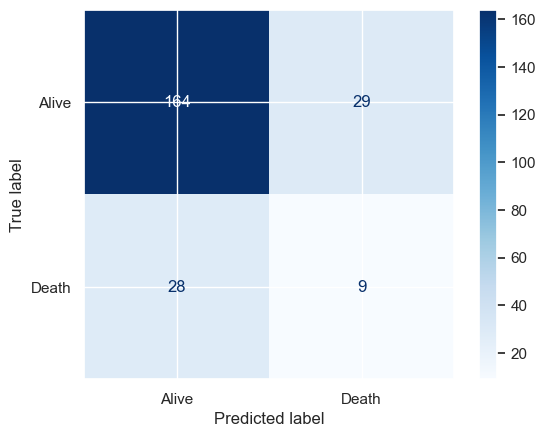

In [92]:
model1 = model_to_use('DT')
model1.fit(X_train2_imp, y_train2)
performance(model1, X_test2, y_test2)


 Accuracy Score : 
  0.8347826086956521

 AUC Score : 
 0.6722447836437473

 Confusion Matrix : 
  [[192   1]
 [ 37   0]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       193
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       230
   macro avg       0.42      0.50      0.45       230
weighted avg       0.70      0.83      0.76       230



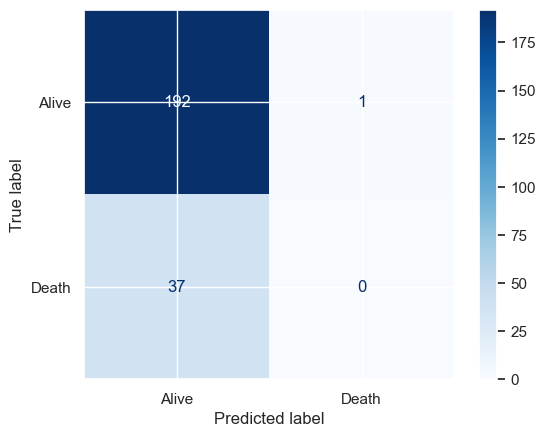

In [93]:
model2 = model_to_use('RF')
model2.fit(X_train2_imp, y_train2)
performance(model2, X_test2, y_test2)


 Accuracy Score : 
  0.808695652173913

 AUC Score : 
 0.6644727629183588

 Confusion Matrix : 
  [[182  11]
 [ 33   4]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       193
         1.0       0.27      0.11      0.15        37

    accuracy                           0.81       230
   macro avg       0.56      0.53      0.52       230
weighted avg       0.75      0.81      0.77       230



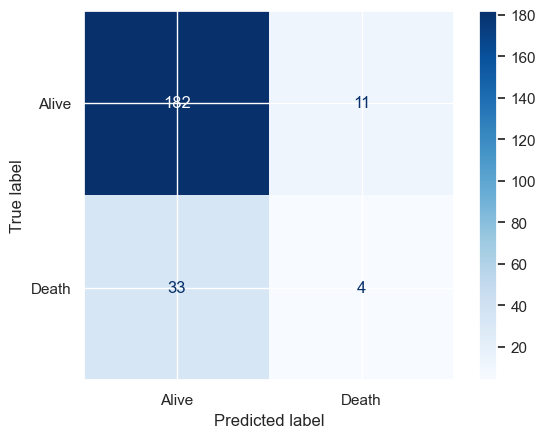

In [94]:
model3 = model_to_use('XGBC')
model3.fit(X_train2_imp, y_train2)
performance(model3, X_test2, y_test2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 120, number of negative: 802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 922, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130152 -> initscore=-1.899617
[LightGBM] [Info] Start training from score -1.899617

 Accuracy Score : 
  0.8347826086956521

 AUC Score : 
 0.6560705783503711

 Confusion Matrix : 
  [[187   6]
 [ 32   5]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       193
         1.0       0.45      0.14      0.21        37

    accuracy                           0.83       230


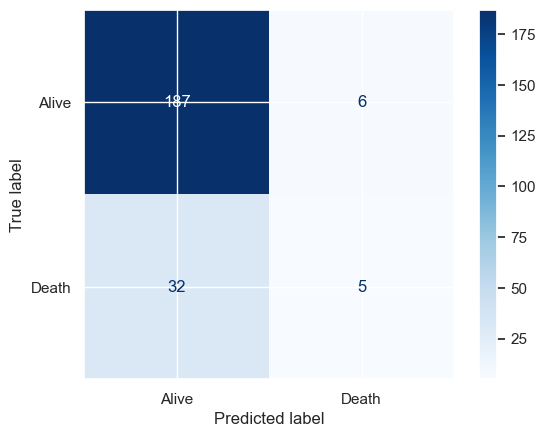

In [95]:
model4 = model_to_use('LGBMC')
model4.fit(X_train2_imp, y_train2)
performance(model4, X_test2, y_test2)


 Accuracy Score : 
  0.8347826086956521

 AUC Score : 
 0.7062036129393643

 Confusion Matrix : 
  [[192   1]
 [ 37   0]]

 Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       193
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       230
   macro avg       0.42      0.50      0.45       230
weighted avg       0.70      0.83      0.76       230



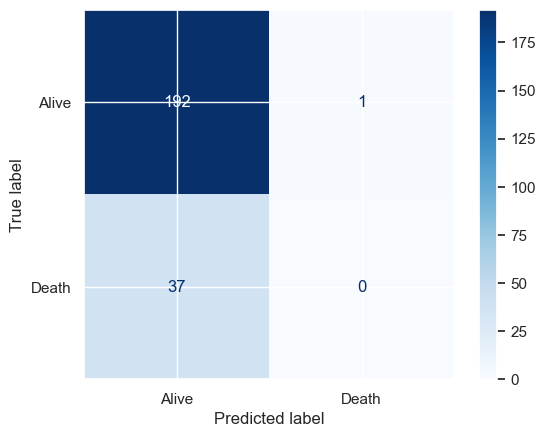

In [96]:
model5 = model_to_use('LR')
model5.fit(X_train2_imp, y_train2)
performance(model5, X_test2, y_test2)